# Part 1: Data Preparation & Exploration

### Task-1: Load dataset

#### Kaggle News Category Dataset

In [66]:
import pandas as pd

In [67]:
data = pd.read_json('app/data/News_Category_Dataset_v3.json', lines=True)

In [68]:
data.head()

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


### Task-2: Preprocess the documents

#### Cleaning and Tokenization

In [70]:
print("Data shape:", data.shape)

Data shape: (209527, 6)


In [71]:
print("Null values per column:\n", data.isnull().sum())

Null values per column:
 link                 0
headline             0
category             0
short_description    0
authors              0
date                 0
dtype: int64


In [72]:
print("Columns:", data.columns)

Columns: Index(['link', 'headline', 'category', 'short_description', 'authors', 'date'], dtype='object')


In [73]:
print("Data Types:\n", data.dtypes )

Data Types:
 link                         object
headline                     object
category                     object
short_description            object
authors                      object
date                 datetime64[ns]
dtype: object


In [74]:
data['category'].nunique()

42

In [75]:
data['authors'].nunique()

29169

In [76]:
data.dropna(subset=['headline', 'short_description'], inplace=True)

In [77]:
data.shape

(209527, 6)

In [84]:
data['headline_tokens'] = data['headline'].apply(lambda x: x.split())
data['short_description_tokens'] = data['short_description'].apply(lambda x: x.split())


In [85]:
data['headline_tokens'].head()

0    [Over, 4, Million, Americans, Roll, Up, Sleeve...
1    [American, Airlines, Flyer, Charged,, Banned, ...
2    [23, Of, The, Funniest, Tweets, About, Cats, A...
3    [The, Funniest, Tweets, From, Parents, This, W...
4    [Woman, Who, Called, Cops, On, Black, Bird-Wat...
Name: headline_tokens, dtype: object

#### Stop-word removal


In [86]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

def remove_stopwords(text):
    if not isinstance(text, str):
        return ""
    tokens = text.lower().split()  # simple tokenization by whitespace + lowercase
    filtered_tokens = [t for t in tokens if t not in ENGLISH_STOP_WORDS]
    return " ".join(filtered_tokens)

# Apply to short_description column
data['short_description_no_stopwords'] = data['short_description'].apply(remove_stopwords)

# Similarly for headline
data['headline_no_stopwords'] = data['headline'].apply(remove_stopwords)


In [87]:
data['headline_no_stopwords'].head()

0    4 million americans roll sleeves omicron-targe...
1    american airlines flyer charged, banned life p...
2      23 funniest tweets cats dogs week (sept. 17-23)
3           funniest tweets parents week (sept. 17-23)
4    woman called cops black bird-watcher loses law...
Name: headline_no_stopwords, dtype: object

#### Calculate document lengths (word counts)

In [88]:
# Count words in 'headline'
data['headline_length'] = data['headline_tokens'].apply(len)

# Count words in 'short_description'
data['short_description_length'] = data['short_description_tokens'].apply(len)

In [89]:
print("Headline length stats:")
print(data['headline_length'].describe())

print("\nShort description length stats:")
print(data['short_description_length'].describe())


Headline length stats:
count    209527.000000
mean          9.600744
std           3.068507
min           0.000000
25%           8.000000
50%          10.000000
75%          12.000000
max          44.000000
Name: headline_length, dtype: float64

Short description length stats:
count    209527.000000
mean         19.669026
std          14.152783
min           0.000000
25%          10.000000
50%          19.000000
75%          24.000000
max         243.000000
Name: short_description_length, dtype: float64


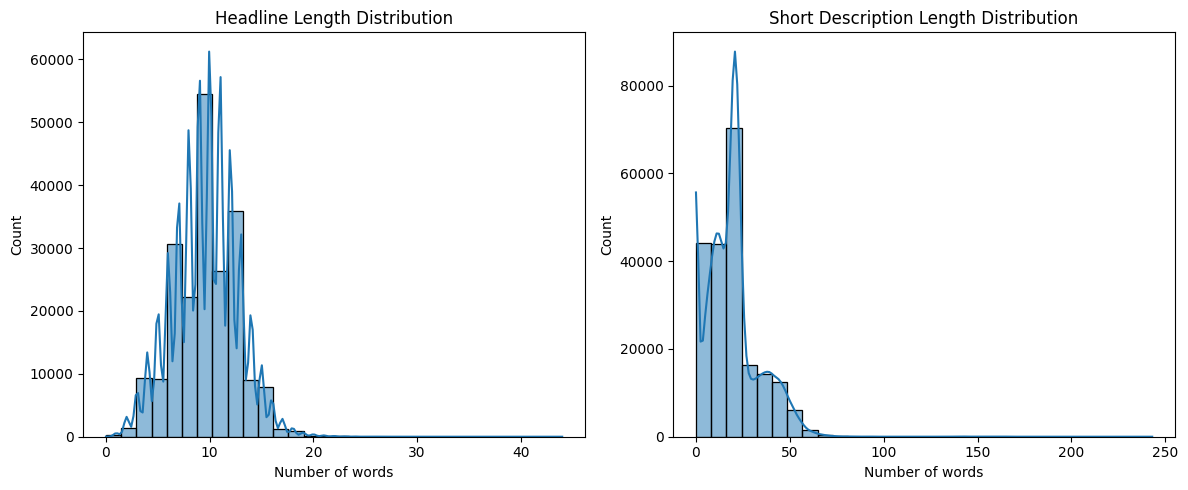

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(data['headline_length'], bins=30, kde=True)
plt.title("Headline Length Distribution")
plt.xlabel("Number of words")

plt.subplot(1,2,2)
sns.histplot(data['short_description_length'], bins=30, kde=True)
plt.title("Short Description Length Distribution")
plt.xlabel("Number of words")

plt.tight_layout()
plt.show()


#### Most frequent words (excluding stop words)


In [ ]:
# Tokenize the cleaned columns (split by whitespace)
data['short_desc_tokens_no_stop'] = data['short_description_no_stopwords'].apply(lambda x: x.split())
data['headline_tokens_no_stop'] = data['headline_no_stopwords'].apply(lambda x: x.split())


In [95]:
from collections import Counter

all_tokens = []

# Extend the list with tokens from both columns (optional)
for tokens_list in data['short_desc_tokens_no_stop']:
    all_tokens.extend(tokens_list)

for tokens_list in data['headline_tokens_no_stop']:
    all_tokens.extend(tokens_list)


In [96]:
word_freq = Counter(all_tokens)


In [99]:
top_n = 20
print(word_freq.most_common(top_n))


[('new', 19181), ('--', 14431), ('trump', 13400), ("it's", 12598), ('just', 12116), ('like', 11044), ('people', 10776), ('time', 9329), ('make', 8940), ('(photos)', 8462), ('day', 7206), ('know', 6922), ('best', 6807), ('donald', 6775), ("don't", 6703), ('want', 6688), ('says', 6369), ('life', 6170), ('need', 6036), ('way', 5650)]


# Part 2: Information Extraction & Summarization

In [101]:
import re

def extract_dates(text):
    # Regex to find dates in YYYY-MM-DD format
    if not isinstance(text, str):
        return []
    date_pattern = r'\b\d{4}-\d{2}-\d{2}\b'
    return re.findall(date_pattern, text)

def extract_numbers(text):
    # Regex to find numbers (integers and decimals)
    if not isinstance(text, str):
        return []
    number_pattern = r'\b\d+(?:\.\d+)?\b'
    return re.findall(number_pattern, text)


In [102]:
data['short_description_extracted_dates'] = data['short_description'].apply(extract_dates)
data['short_description_extracted_numbers'] = data['short_description'].apply(extract_numbers)

In [103]:
data.head()

,link,headline,category,short_description,authors,date,headline_tokens,short_description_tokens,headline_length,short_description_length,short_description_no_stopwords,headline_no_stopwords,short_desc_tokens_no_stop,headline_tokens_no_stop,short_description_extracted_dates,short_description_extracted_numbers
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23,"[Over, 4, Million, Americans, Roll, Up, Sleeve...","[Health, experts, said, it, is, too, early, to...",11,29,health experts said early predict demand match...,4 million americans roll sleeves omicron-targe...,"[health, experts, said, early, predict, demand...","[4, million, americans, roll, sleeves, omicron...",[],[171]
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23,"[American, Airlines, Flyer, Charged,, Banned, ...","[He, was, subdued, by, passengers, and, crew, ...",13,28,subdued passengers crew fled aircraft confront...,"american airlines flyer charged, banned life p...","[subdued, passengers, crew, fled, aircraft, co...","[american, airlines, flyer, charged,, banned, ...",[],[]
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23,"[23, Of, The, Funniest, Tweets, About, Cats, A...","[""Until, you, have, a, dog, you, don't, unders...",13,12,"""until dog don't understand eaten.""",23 funniest tweets cats dogs week (sept. 17-23),"[""until, dog, don't, understand, eaten.""]","[23, funniest, tweets, cats, dogs, week, (sept...",[],[]
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23,"[The, Funniest, Tweets, From, Parents, This, W...","[""Accidentally, put, grown-up, toothpaste, on,...",9,25,"""accidentally grown-up toothpaste toddler’s to...",funniest tweets parents week (sept. 17-23),"[""accidentally, grown-up, toothpaste, toddler’...","[funniest, tweets, parents, week, (sept., 17-23)]",[],[]
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22,"[Woman, Who, Called, Cops, On, Black, Bird-Wat...","[Amy, Cooper, accused, investment, firm, Frank...",11,25,amy cooper accused investment firm franklin te...,woman called cops black bird-watcher loses law...,"[amy, cooper, accused, investment, firm, frank...","[woman, called, cops, black, bird-watcher, los...",[],[]


# Analysis

#### Number of news articles per category

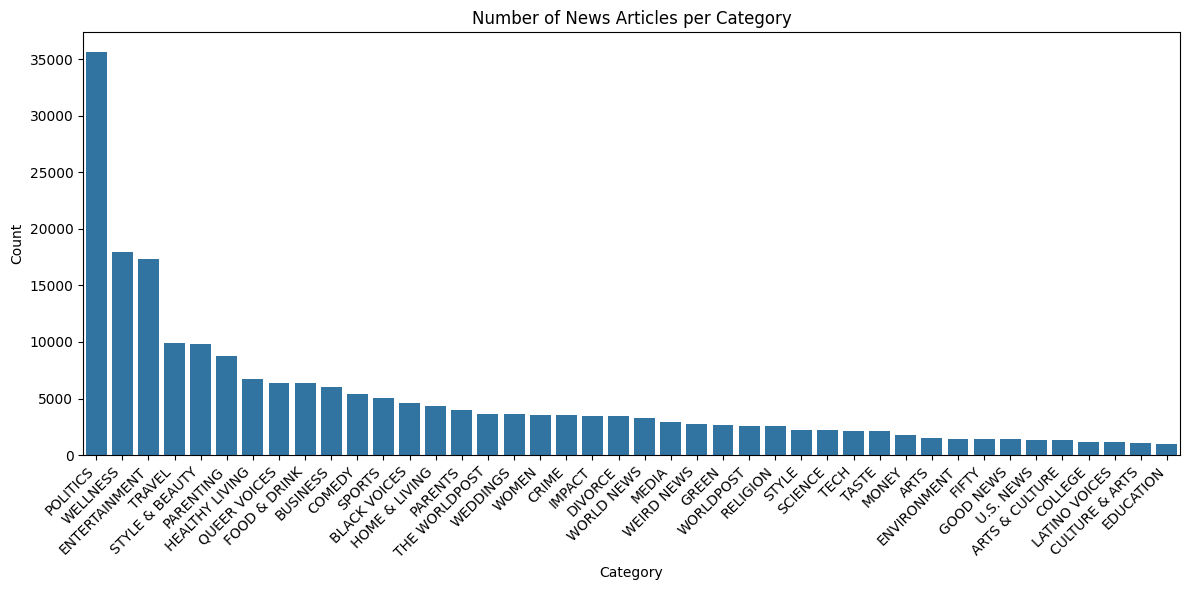

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.countplot(data=data, x='category', order=data['category'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.title("Number of News Articles per Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


#### Number of news articles per author (top 20 authors)

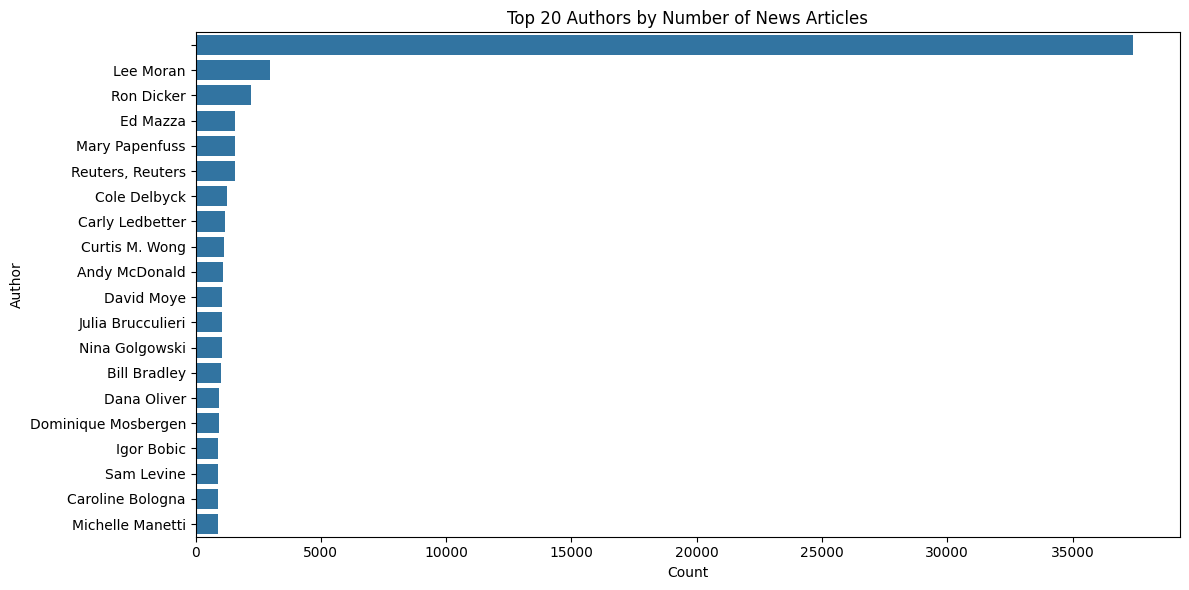

In [108]:
plt.figure(figsize=(12,6))
top_authors = data['authors'].value_counts().head(20).index
sns.countplot(data=data[data['authors'].isin(top_authors)], y='authors', order=top_authors)
plt.title("Top 20 Authors by Number of News Articles")
plt.xlabel("Count")
plt.ylabel("Author")
plt.tight_layout()
plt.show()


#### Year-based analysis: Number of news per year

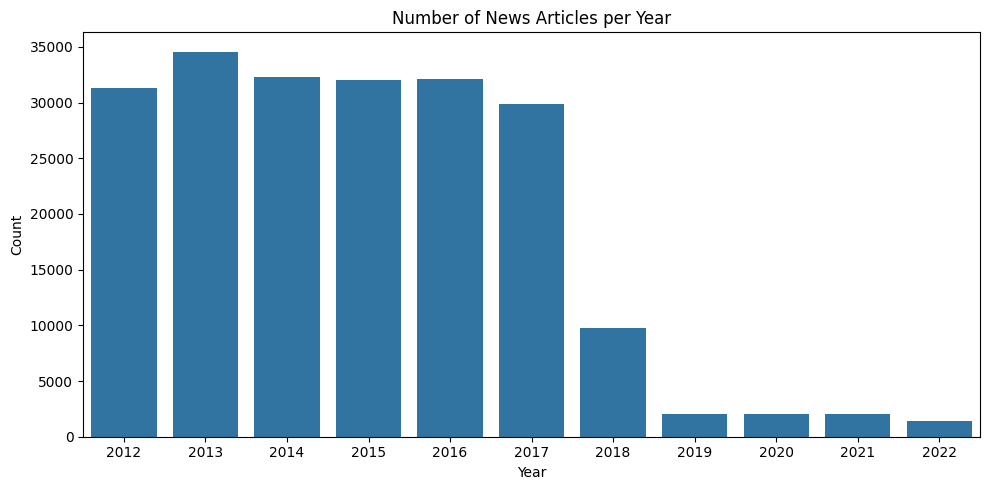

In [109]:
# Convert date column to datetime if needed
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Extract year
data['year'] = data['date'].dt.year

plt.figure(figsize=(10,5))
sns.countplot(data=data, x='year', order=sorted(data['year'].dropna().unique()))
plt.title("Number of News Articles per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [111]:
data= data[:1000]

In [112]:
data.shape

(1000, 17)

In [117]:
data.to_csv('app/data/cleaned_news_data.csv', index=False)

In [120]:
data.columns

Index(['link', 'headline', 'category', 'short_description', 'authors', 'date',
       'headline_tokens', 'short_description_tokens', 'headline_length',
       'short_description_length', 'short_description_no_stopwords',
       'headline_no_stopwords', 'short_desc_tokens_no_stop',
       'headline_tokens_no_stop', 'short_description_extracted_dates',
       'short_description_extracted_numbers', 'year'],
      dtype='object')

In [121]:
pip list

Package                                  Version
---------------------------------------- -----------
absl-py                                  2.1.0
aioboto3                                 13.3.0
aiobotocore                              2.16.0
aiofiles                                 24.1.0
aiohappyeyeballs                         2.4.4
aiohttp                                  3.11.11
aioitertools                             0.12.0
aiosignal                                1.3.2
altair                                   5.5.0
annotated-types                          0.7.0
anyio                                    4.9.0
appnope                                  0.1.4
asttokens                                2.4.1
astunparse                               1.6.3
attrs                                    24.3.0
backoff                                  2.2.1
bcrypt                                   4.3.0
blinker                                  1.9.0
blis                                     1.3.